#  Linear Regression

## Ocean Salinity Prediction

The temp_salinity.csv file contains data of ocean, its temperature and salinity. We have to predict the salinity of the water based on its temperature. 

Perform regression analysis on the data, and answer the following questions.

#### 1. Plot a scatter plot of temp vs salinity. What is the relationship between them? 
#### 2. Calculate mean and standard deviation of salinity. Find out outliers(value greater than 2 standard deviations) in your data. List them down. 
#### 3. Filter out rows in your dataset, whose price is greater than 2 standard deviations. Plot a scatter of temp vs salinity, with outliers in a different color.
#### 4. Now split your filtered data with a 75:25 ratio using the train_test_split function. Perform linear regression with the training dataset. Plot the line of regression with the training data set. 
#### 5. Predict the output with the test data set. Find out the MSE, R^2 score. Plot a scatter of test output vs obtained output. 
#### 6. Perform another split of 80:20, and repeat steps 4 & 5. Which training yields a better score, Justify. 
#### 7. On the entire dataset, perform K Fold cross validation where k goes from 3-10. Print the average accuracy obtained for each value of k. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("temp_salinity.csv")
df.dropna()

,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
...,...,...
745,9.09,33.480
746,8.90,33.601
747,8.56,33.930
748,8.43,33.988


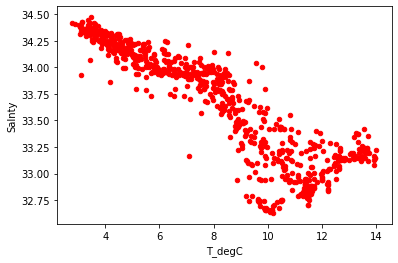

In [2]:
#P1
df.plot.scatter("T_degC","Salnty",color='r')

In [3]:
#P2
df["mean"]=df["Salnty"].mean()
print("the mean of Salinity is",df["mean"])
df["sd"]=df["Salnty"].std()
print("the standard deviation is",df["sd"])
list1=df[df.apply(lambda x: (df["Salnty"]-df["mean"])>2).all(axis=1)]
list1
df.dropna()
df

the mean of Salinity is 0      33.618971
1      33.618971
2      33.618971
3      33.618971
4      33.618971
         ...    
745    33.618971
746    33.618971
747    33.618971
748    33.618971
749    33.618971
Name: mean, Length: 750, dtype: float64
the standard deviation is 0      0.527919
1      0.527919
2      0.527919
3      0.527919
4      0.527919
         ...   
745    0.527919
746    0.527919
747    0.527919
748    0.527919
749    0.527919
Name: sd, Length: 750, dtype: float64


,T_degC,Salnty,mean,sd
0,10.50,33.440,33.618971,0.527919
1,10.46,33.440,33.618971,0.527919
2,10.46,33.437,33.618971,0.527919
3,10.45,33.420,33.618971,0.527919
4,10.45,33.421,33.618971,0.527919
...,...,...,...,...
745,9.09,33.480,33.618971,0.527919
746,8.90,33.601,33.618971,0.527919
747,8.56,33.930,33.618971,0.527919
748,8.43,33.988,33.618971,0.527919


In [20]:
#4. Now split your filtered data with a 75:25 ratio using the train_test_split function. Perform linear regression with the training dataset. Plot the line of regression with the training data set.

print(df.shape)
df2=df.dropna()
print(df2.shape)
temp = df2['T_degC']
sal = df2['Salnty']

(750, 4)
(725, 4)


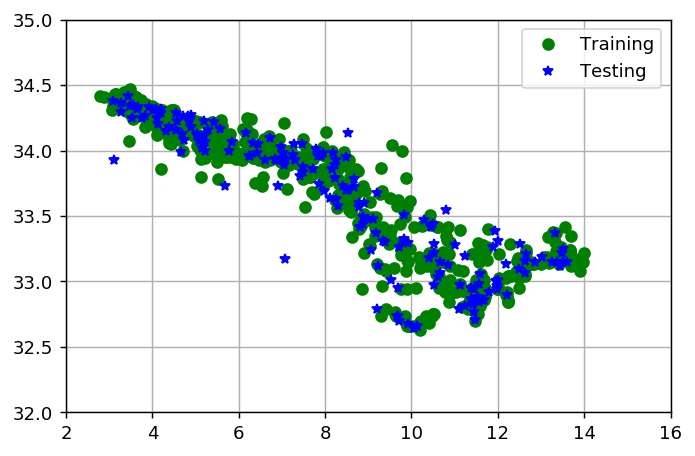

In [5]:
from sklearn.model_selection import train_test_split

temp_train, temp_test, sal_train, sal_test = train_test_split(temp,sal,test_size=0.25)
 
plt.figure(dpi=130)
plt.plot(temp_train,sal_train,"go",label = "Training")
plt.plot(temp_test,sal_test,"b*",label = "Testing")
plt.axis([2,16,32,35])
plt.legend()
plt.grid(True)
plt.show()

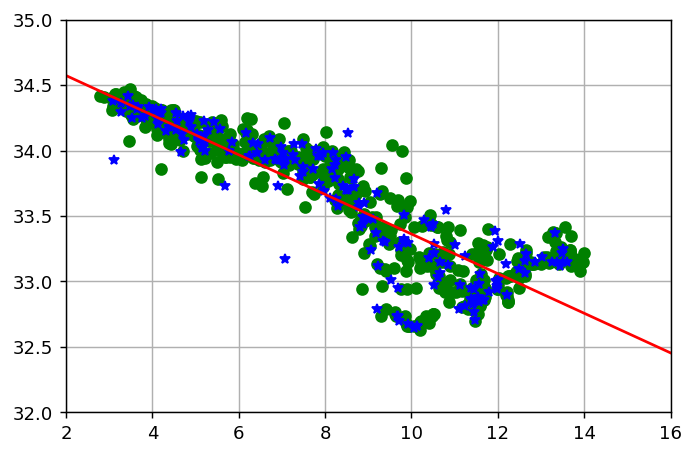

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x = np.array(temp_train).reshape(-1,1)
model.fit(x,sal_train) 
x_test = np.array(temp_test).reshape(-1,1)
plt.figure(dpi=130)
plt.plot(temp_train,sal_train,"go",label = "Training")
plt.plot(temp_test,sal_test,"b*",label = "Testing")
plt.axis([2,16,32,35])
plt.grid(True)
plt.plot([2,16],[model.predict([[2]])[0],
                 model.predict([[16]])[0]],color='r')

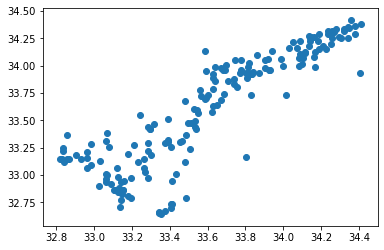

In [8]:
plt.scatter(model.predict(xtest),sal_test)

In [19]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(sal,model.predict(np.array(temp).reshape(-1,1)),multioutput="uniform_average")
print("SGD MSE is ",mse)

SGD MSE is  0.057279364940397


In [10]:
print("R^2 is ",model.score(np.array(temp).reshape(-1,1),sal))

R^2 is  0.7940291434020211


In [12]:
print(df.shape)
df3=df.dropna()
print(df3.shape)
temp1 = df3['T_degC']
sal1 = df3['Salnty']

(750, 4)
(725, 4)


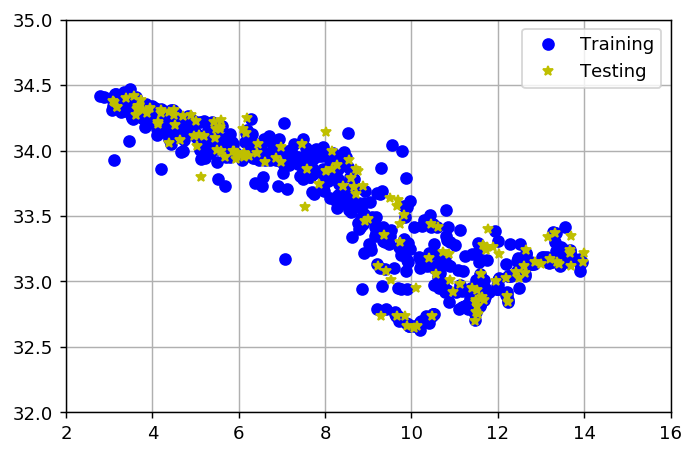

In [13]:
from sklearn.model_selection import train_test_split

temp1_train, temp1_test, sal1_train, sal1_test = train_test_split(temp,sal,test_size=0.20)
 
plt.figure(dpi=130)
plt.plot(temp1_train,sal1_train,"bo",label = "Training")
plt.plot(temp1_test,sal1_test,"y*",label = "Testing")
plt.axis([2,16,32,35])
plt.legend()
plt.grid(True)
plt.show()

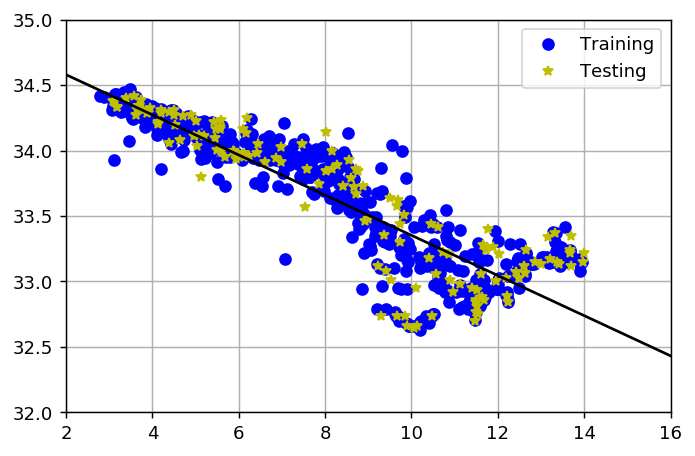

In [14]:
from sklearn.linear_model import LinearRegression
import numpy as np


model1 = LinearRegression()
x1 = np.array(temp1_train).reshape(-1,1)
model1.fit(x1,sal1_train) 
x1test = np.array(temp1_test).reshape(-1,1)
plt.figure(dpi=130)
plt.plot(temp1_train,sal1_train,"bo",label = "Training")
plt.plot(temp1_test,sal1_test,"y*",label = "Testing")
plt.axis([2,16,32,35])
plt.grid(True)
plt.legend()
plt.plot([2,16],[model1.predict([[2]])[0],
                 model1.predict([[16]])[0]],color='k')

In [15]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(sal1,model1.predict(np.array(temp1).reshape(-1,1)),multioutput="uniform_average")
print("SGD MSE is ",mse)

SGD MSE is  0.057291191618192946


In [16]:
print("R^2 is ",model1.score(np.array(temp1).reshape(-1,1),sal1))

R^2 is  0.7939866158537694
